# Figure 1, part 2

Removed splicing events in genes with TPM < 1 in Notebook `1.1 Supplementary Figure 1`.

In [2]:
from collections import defaultdict

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline


import flotilla
sns.set(style='ticks', context='talk')

# folder = '/home/obotvinnik/Dropbox/figures2/singlecell_pnm/figure1_expression'
folder = 'pdfs'

flotilla_dir = '/projects/ps-yeolab/obotvinnik/flotilla_projects/'

study = flotilla.embark('singlecell_pnm_figure1_supplementary_post_splicing_filtering', flotilla_dir=flotilla_dir)

/home/obotvinnik/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:810: UserWarning: Found matplotlib configuration in ~/.matplotlib/. To conform with the XDG base directory standard, this configuration location has been deprecated on Linux, and the new location is now /home/obotvinnik/.config/matplotlib/. Please move your configuration there to ensure that matplotlib will continue to find it in the future.
  _get_xdg_config_dir())
/home/obotvinnik/anaconda/lib/python2.7/site-packages/flotilla/__init__.py:55: DtypeWarning: Columns (11,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  load_species_data=load_species_data)


2016-04-29 15:43:52	Reading datapackage from /projects/ps-yeolab/obotvinnik/flotilla_projects/singlecell_pnm_figure1_supplementary_post_splicing_filtering/datapackage.json
2016-04-29 15:43:52	Parsing datapackage to create a Study object
2016-04-29 15:44:33	Initializing Study
2016-04-29 15:44:33	Initializing Predictor configuration manager for Study
2016-04-29 15:44:33	Predictor ExtraTreesClassifier is of type <class 'sklearn.ensemble.forest.ExtraTreesClassifier'>
2016-04-29 15:44:33	Added ExtraTreesClassifier to default predictors
2016-04-29 15:44:33	Predictor ExtraTreesRegressor is of type <class 'sklearn.ensemble.forest.ExtraTreesRegressor'>
2016-04-29 15:44:33	Added ExtraTreesRegressor to default predictors
2016-04-29 15:44:33	Predictor GradientBoostingClassifier is of type <class 'sklearn.ensemble.gradient_boosting.GradientBoostingClassifier'>
2016-04-29 15:44:33	Added GradientBoostingClassifier to default predictors
2016-04-29 15:44:33	Predictor GradientBoostingRegressor is of typ

In [3]:
study.expression.data.head()

,ENSG00000000003,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000001036,ENSG00000001084,ENSG00000001167,ENSG00000001460,ENSG00000001461,ENSG00000001497,...,ENSGR0000182378,ENSGR0000185960,ENSGR0000197976,ENSGR0000198223,ENSGR0000205755,ENSGR0000214717,ENSGR0000223511,ENSGR0000226179,ENSGR0000236871,ENSGR0000270726
CVN_01,9.583297,3.691144,0.000000,0.000000,2.748821,0,1.722466,0,0.000000,7.703080,...,1.774580,0.080647,0.291587,1.017003,0.080984,6.998972,0.153573,0.119524,0.000000,2.905205
CVN_02,5.338678,0.000000,0.000000,0.113387,0.000000,0,0.503710,0,1.451580,6.666089,...,4.323377,0.495262,0.000000,0.568696,0.000000,0.000000,0.000000,0.116144,0.087565,3.746504
CVN_03,0.146438,0.000000,1.262223,0.000000,0.000000,0,0.291712,0,0.000000,0.000000,...,0.225987,0.000000,0.000000,0.330164,0.263555,0.000000,0.000000,0.000000,0.000000,0.000000
CVN_04,8.422662,2.593897,0.000000,0.000000,6.688600,0,8.181010,0,1.155126,5.373481,...,1.646223,0.562974,0.000000,0.223287,0.140263,0.195424,0.000000,1.601383,0.205765,1.533982
CVN_05,7.531459,5.124018,0.262705,4.346173,0.397903,0,6.262296,0,0.614197,8.701198,...,0.900241,0.353069,0.000000,0.646603,0.260183,6.631383,0.000000,0.096939,0.133075,0.553417


In [4]:
event = 'exon:chr10:1043148-1043248:+@exon:chr10:1044943-1045035:+@exon:chr10:1046617-1046808:+'

event in study.splicing.data

False

In [5]:
study.metadata._phenotype_to_color = {u'MN': u'#228a44',
                                     u'NPC': u'#73c476',
                                     u'iPSC': u'#c7e9c0'}

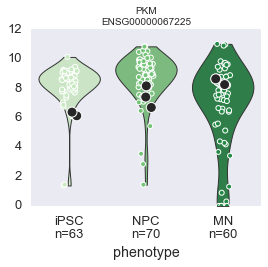

In [6]:
with sns.axes_style('dark'):
    study.plot_gene('PKM', sample_subset='~outlier')
    fig = plt.gcf()
    for ax in fig.axes:
        ax.set(ylim=(0, 12))

/home/obotvinnik/anaconda/lib/python2.7/site-packages/flotilla/visualize/decomposition.py:178: FutureWarning: sort is deprecated, use sort_values(inplace=True) for for INPLACE sorting
  self.magnitudes.sort(ascending=False)
/home/obotvinnik/anaconda/lib/python2.7/site-packages/flotilla/visualize/decomposition.py:185: FutureWarning: sort is deprecated, use sort_values(inplace=True) for for INPLACE sorting
  x.sort(ascending=True)
/home/obotvinnik/anaconda/lib/python2.7/site-packages/flotilla/visualize/decomposition.py:514: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  components = components.sort(columns='pc_1', ascending=False)


featurewise : False
y_pc : 2
data_type : expression
std_multiplier : 2.0
most_variant_features : False
show_point_labels : False
plot_violins : False
sample_subset : all_samples
feature_subset : variant
bokeh : False
color_samples_by : phenotype
scale_by_variance : True
x_pc : 1
list_link : 


<function flotilla.visualize.ipython_interact.do_interact>

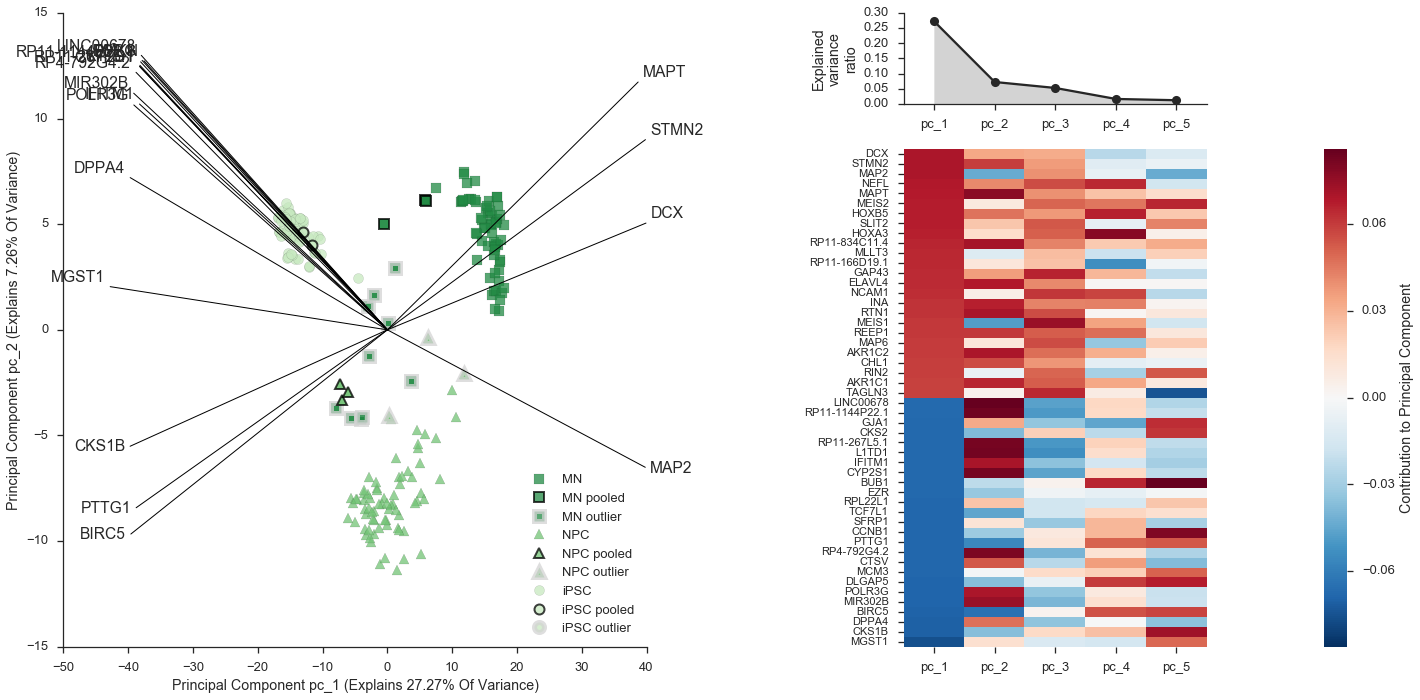

In [7]:
study.interactive_pca()

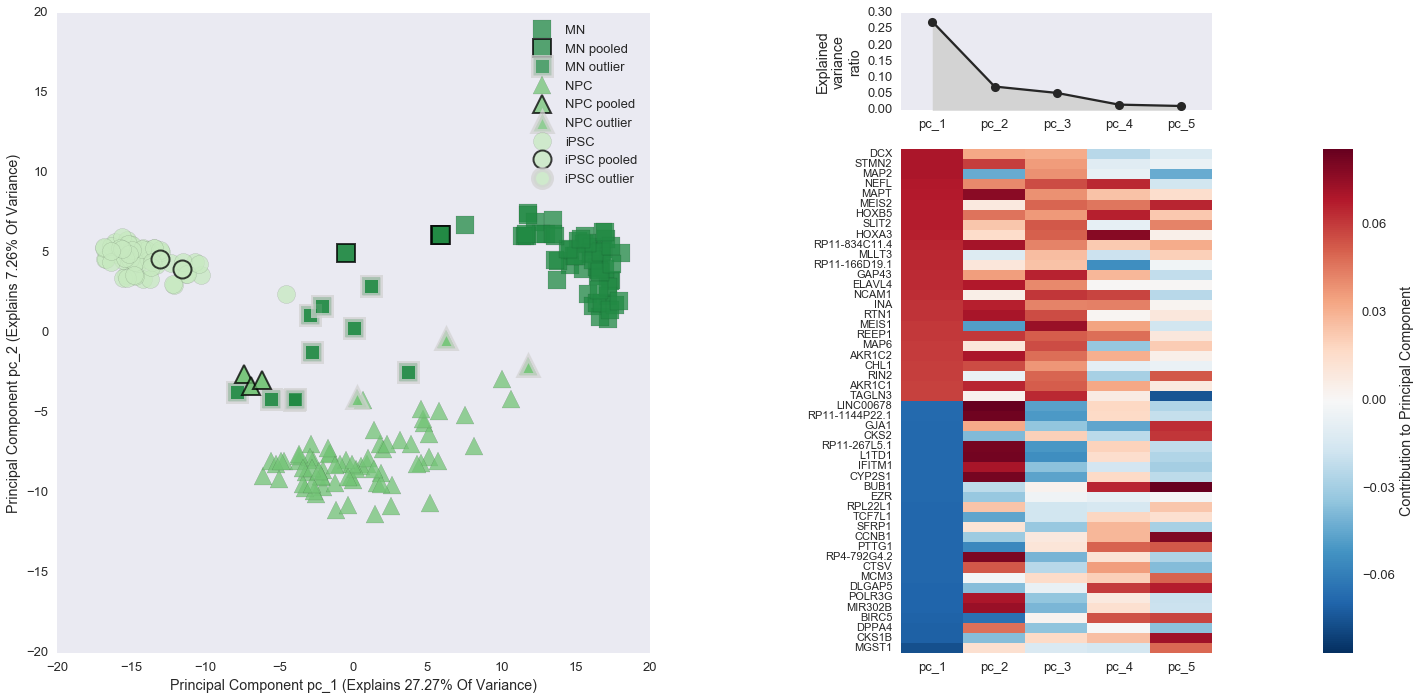

In [8]:
with sns.axes_style('dark'):
    viz = study.plot_pca(show_vectors=False, scale_by_variance=False, markersize=18)
    xmin, xmax, ymin, ymax = viz.ax_components.axis()
    vmin = min(xmin, ymin)
    vmax = max(xmax, ymax)
    viz.ax_components.set(xlim=(vmin, vmax), ylim=(vmin, vmax))
    viz.fig_reduced.savefig('{}/expression_pca.pdf'.format(folder))

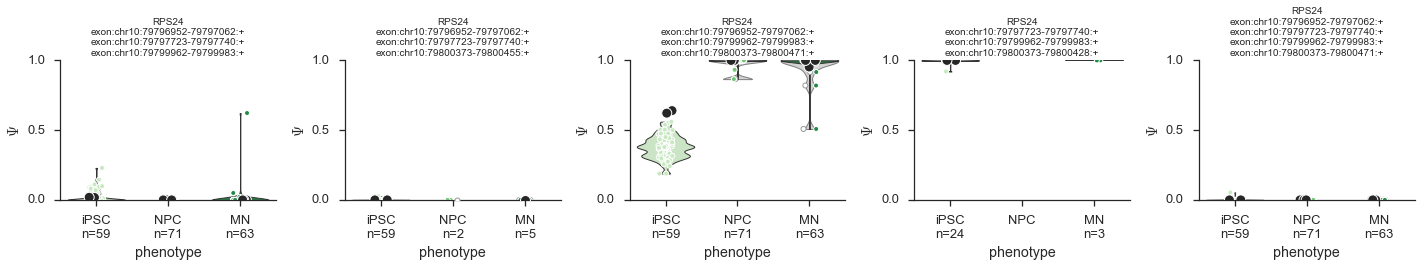

In [9]:
study.plot_event("RPS24")

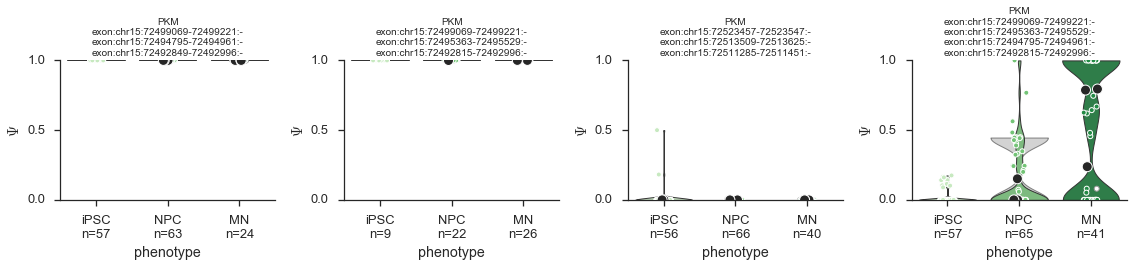

In [10]:
study.plot_event("PKM")

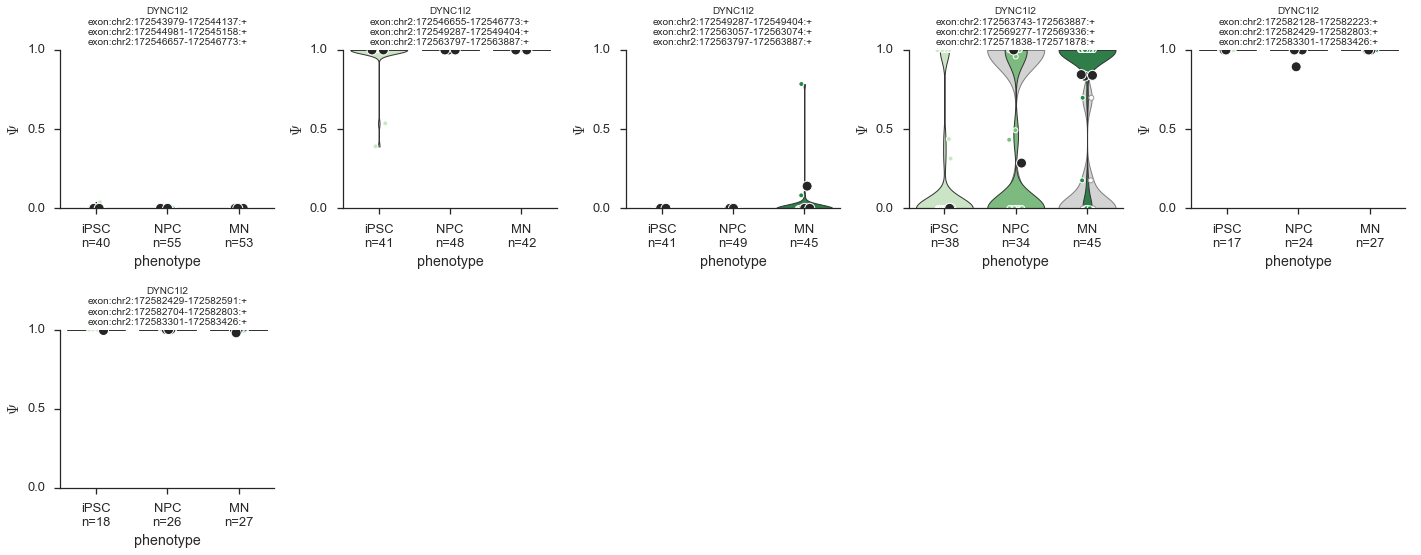

In [11]:
study.plot_event("DYNC1I2")

### Number of splicing events in non-differentially expressed genes

In [12]:
from flotilla.compute.expression import differential_expression


In [13]:
singles_not_outliers = study.expression.singles.loc[~study.expression.singles.index.isin(study.expression.outlier_samples)]
singles_not_outliers.head()

,ENSG00000000003,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000001036,ENSG00000001084,ENSG00000001167,ENSG00000001460,ENSG00000001461,ENSG00000001497,...,ENSGR0000182378,ENSGR0000185960,ENSGR0000197976,ENSGR0000198223,ENSGR0000205755,ENSGR0000214717,ENSGR0000223511,ENSGR0000226179,ENSGR0000236871,ENSGR0000270726
CVN_01,9.583297,3.691144,0.000000,0.000000,2.748821,0,1.722466,0,0.000000,7.703080,...,1.774580,0.080647,0.291587,1.017003,0.080984,6.998972,0.153573,0.119524,0.000000,2.905205
CVN_02,5.338678,0.000000,0.000000,0.113387,0.000000,0,0.503710,0,1.451580,6.666089,...,4.323377,0.495262,0.000000,0.568696,0.000000,0.000000,0.000000,0.116144,0.087565,3.746504
CVN_03,0.146438,0.000000,1.262223,0.000000,0.000000,0,0.291712,0,0.000000,0.000000,...,0.225987,0.000000,0.000000,0.330164,0.263555,0.000000,0.000000,0.000000,0.000000,0.000000
CVN_04,8.422662,2.593897,0.000000,0.000000,6.688600,0,8.181010,0,1.155126,5.373481,...,1.646223,0.562974,0.000000,0.223287,0.140263,0.195424,0.000000,1.601383,0.205765,1.533982
CVN_05,7.531459,5.124018,0.262705,4.346173,0.397903,0,6.262296,0,0.614197,8.701198,...,0.900241,0.353069,0.000000,0.646603,0.260183,6.631383,0.000000,0.096939,0.133075,0.553417


In [14]:
differential_results = differential_expression(singles_not_outliers, groupby=study.sample_id_to_phenotype)

/home/obotvinnik/anaconda/lib/python2.7/site-packages/flotilla/compute/expression.py:234: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  de_results = de_results.sort('bonferonni_p_value')


In [15]:
differential_results.head()

,gene_id,U_statistic,p_value,bonferonni_p_value
0,ENSG00000234273,182.385219,2.486296e-40,3.985035e-36
1,ENSG00000258417,182.385219,2.486296e-40,3.985035e-36
2,ENSG00000249152,182.385219,2.486296e-40,3.985035e-36
3,ENSG00000130203,182.385219,2.486296e-40,3.985035e-36
4,ENSG00000167600,182.385219,2.486296e-40,3.985035e-36


In [16]:
differential_results['log10_bonferonni_p_value'] = -np.log10(differential_results.bonferonni_p_value)

In [17]:
log_p_cutoff = 2

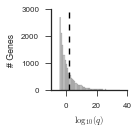

In [18]:
sns.set(style='ticks', context='paper')
fig, ax = plt.subplots(figsize=(2, 2))
# plt.yscale('log', nonposy='clip')

sns.distplot(differential_results['log10_bonferonni_p_value'], color='grey', kde=False)
ymin, ymax = ax.get_ylim()
ax.locator_params(nbins=4)

ax.vlines(log_p_cutoff, ymin, ymax, linestyle='--')
ax.set(ylabel='# Genes', xlabel='$\log_{10}(q)$')
sns.despine()

fig.tight_layout()
fig.savefig('{}/differential_expression_kruskal_wallis_bonferonni_p_value_cutoff.pdf'.format(folder))

In [19]:
non_de_genes = differential_results.gene_id.loc[differential_results.log10_bonferonni_p_value <= log_p_cutoff]
len(non_de_genes)

11260

### PCA of constitutively expressed genes

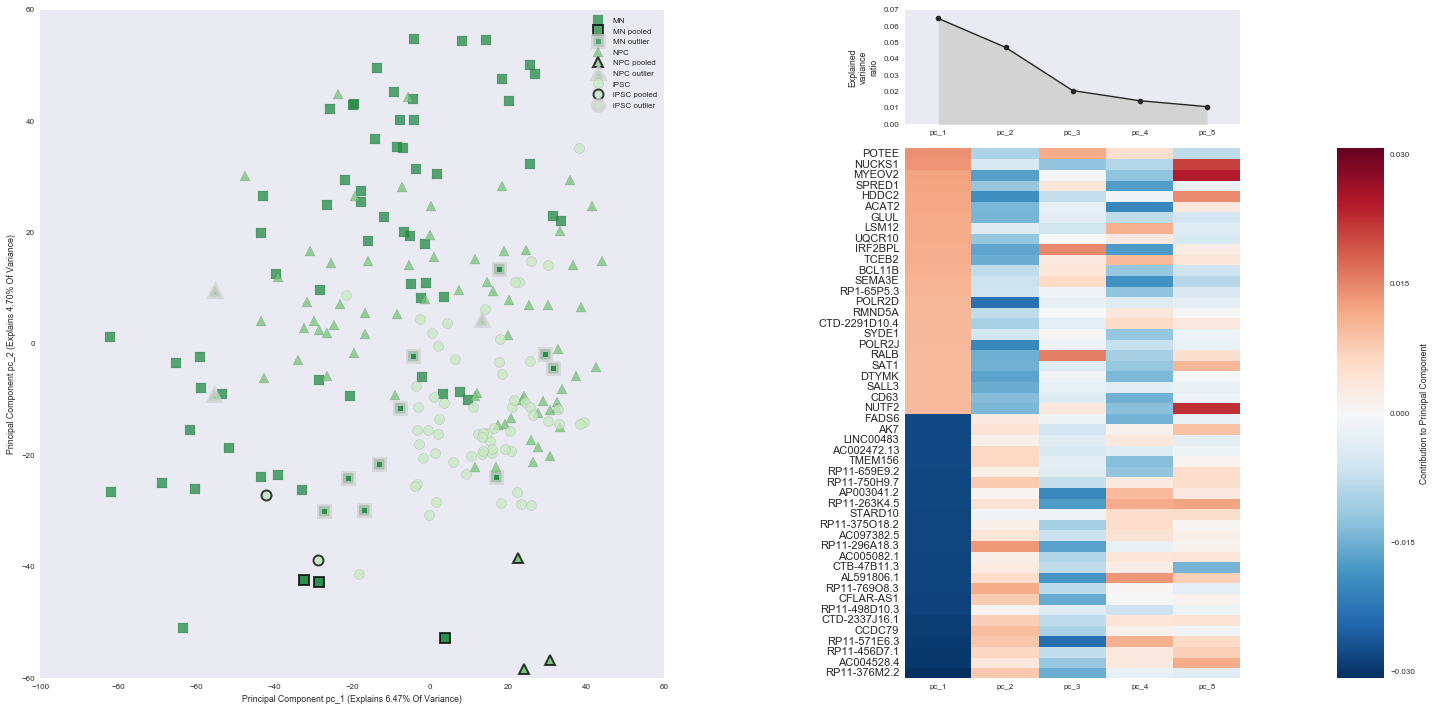

In [20]:
sns.set(style='dark', context='paper')
pcaviz = study.plot_pca(feature_subset=non_de_genes, show_vectors=False)
pcaviz.fig_reduced.savefig('{}/constitutively_expressed_genes_expression_pca.pdf'.format(folder))

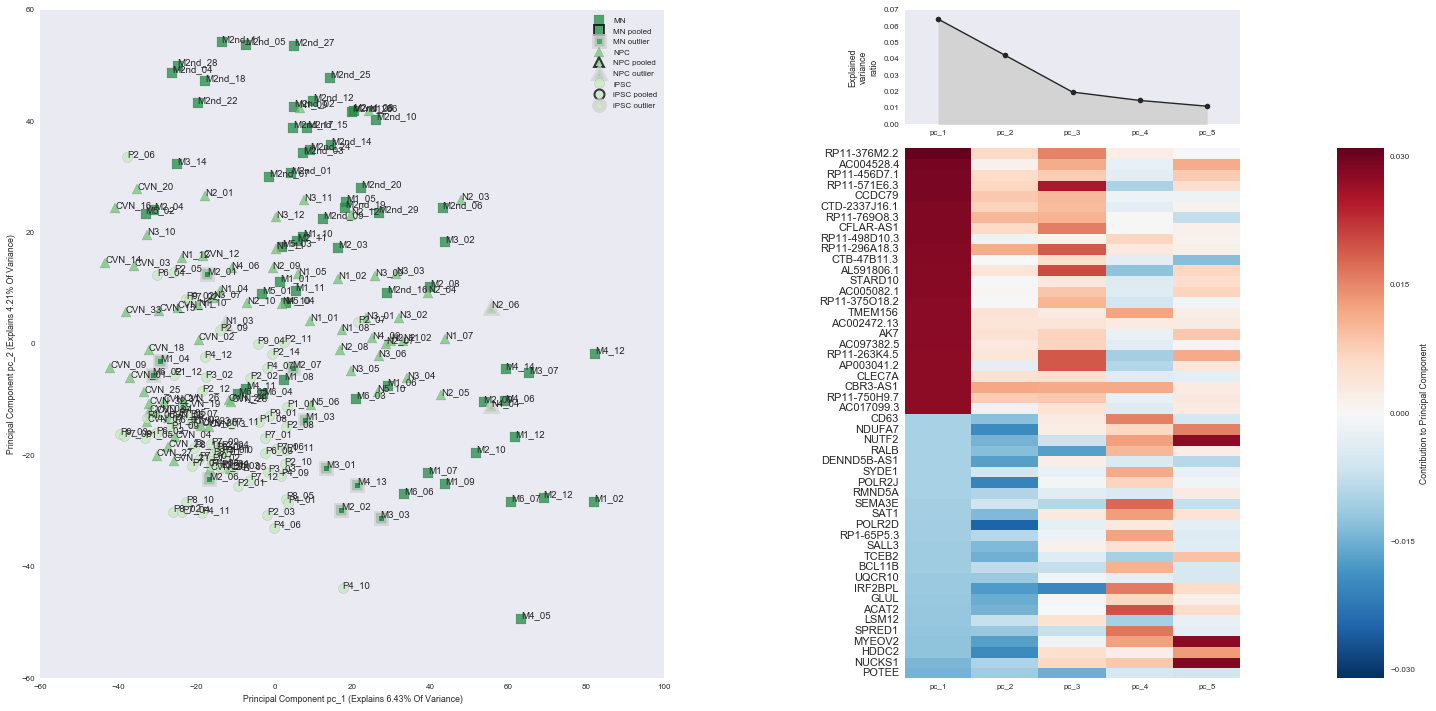

In [21]:
sns.set(style='dark', context='paper')
pcaviz = study.plot_pca(feature_subset=non_de_genes, show_vectors=False, show_point_labels=True, sample_subset='~pooled')

`M2_12` and `M6_07` are the two motor neuron samples that always stick out

In [22]:
weird_samples = ['M2_12', 'M6_07', 'M1_06', 'M6_03']

In [23]:
study.mapping_stats.data.loc[weird_samples, 'Number of input reads']/1e6

M2_12     13.122227
M6_07     96.759045
M1_06     17.723146
M6_03    104.800138
Name: Number of input reads, dtype: float64

So it's not a read depth issue...

In [24]:
samples = ['M2_12', 'M6_07']
study.metadata.data['MN_outlier'] = False
study.metadata.data.loc[weird_samples, 'MN_outlier'] = True

In [25]:
mn = study.sample_subset_to_sample_ids('MN')
mn_single = mn.intersection(study.expression.singles.index)
mn_single_not_outlier = mn.difference(study.expression.outliers.index)
len(mn_single_not_outlier)

63

In [26]:
mn_single_not_outlier.isin(samples)

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True], dtype=bool)

In [27]:
mn_single_not_outlier_not_weird = mn_single_not_outlier.difference(weird_samples)
mn_single_not_outlier_not_weird

Index([u'M1_01', u'M1_02', u'M1_05', u'M1_07', u'M1_08', u'M1_09', u'M1_10',
       u'M1_11', u'M1_12', u'M2_03', u'M2_04', u'M2_05', u'M2_08', u'M2_09',
       u'M2_10', u'M2_11', u'M2nd_01', u'M2nd_02', u'M2nd_03', u'M2nd_04',
       u'M2nd_05', u'M2nd_06', u'M2nd_07', u'M2nd_08', u'M2nd_09', u'M2nd_10',
       u'M2nd_11', u'M2nd_12', u'M2nd_13', u'M2nd_14', u'M2nd_15', u'M2nd_16',
       u'M2nd_17', u'M2nd_18', u'M2nd_19', u'M2nd_20', u'M2nd_21', u'M2nd_22',
       u'M2nd_24', u'M2nd_25', u'M2nd_26', u'M2nd_27', u'M2nd_28', u'M2nd_29',
       u'M3_02', u'M3_07', u'M3_14', u'M4_05', u'M4_06', u'M4_11', u'M4_12',
       u'M4_14', u'M5_01', u'M5_02', u'M5_03', u'M5_04', u'M6_04', u'M6_05',
       u'M6_06'],
      dtype='object')

In [28]:
singles_not_outliers = study.expression.singles.index.difference(study.expression.outliers.index)
singles_not_outliers_not_weird = singles_not_outliers.difference(weird_samples)

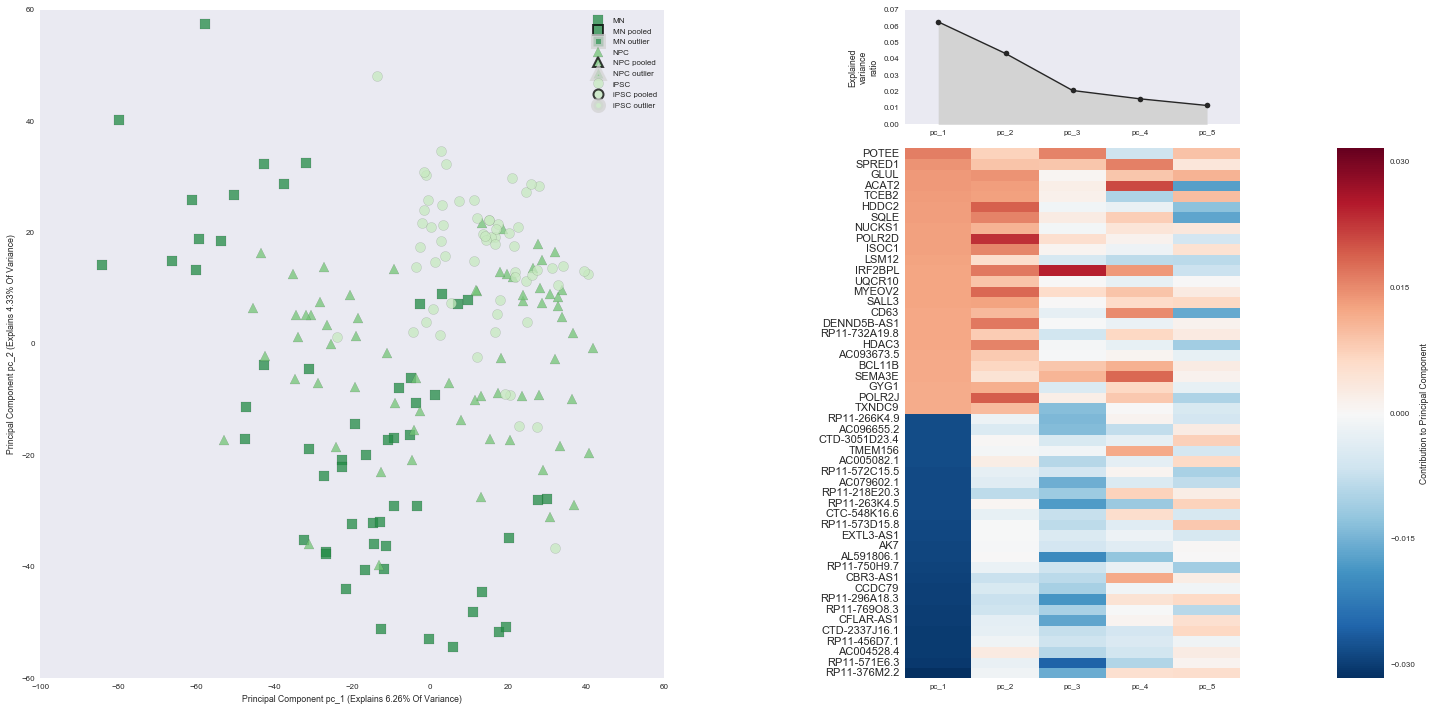

In [29]:
sns.set(style='dark', context='paper')

pcaviz = study.plot_pca(feature_subset=non_de_genes, show_vectors=False, #show_point_labels=True,
                        sample_subset=singles_not_outliers_not_weird)

In [30]:
trait = 'MN_outlier'
trait_data = study.metadata.data[trait]
trait_data[trait_data]

M1_06    True
M2_12    True
M6_03    True
M6_07    True
Name: MN_outlier, dtype: bool

2016-04-29 15:46:22 Configuring predictor type: ExtraTreesClassifier with 16028 featuresFitting a predictor for X:MN_outlier_all_genes, y:MN_outlier, method:ExtraTreesClassifier... please wait.


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    1.0s
[Parallel(n_jobs=4)]: Done 802 out of 802 | elapsed:    1.0s finished


	Finished.


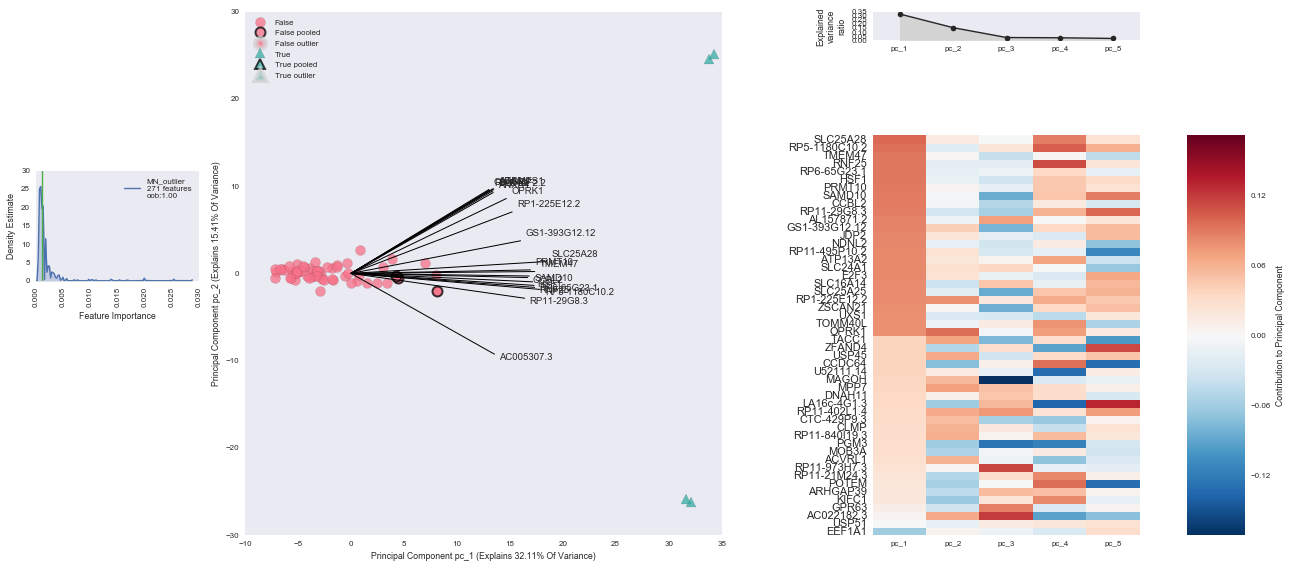

In [31]:
trait = 'MN_outlier'
trait_data = study.metadata.data[trait]
viz = study.expression.plot_classifier(trait_data, data_name='MN_outlier_all_genes', sample_ids=mn_single_not_outlier, 
                                 label_to_color=study.phenotype_to_color, groupby=study.sample_id_to_phenotype, 
                                 label_to_marker=study.phenotype_to_marker, order=study.phenotype_order)

In [32]:
important_features = viz.important_features_[viz.important_features_].index

In [33]:
from flotilla.compute.expression import differential_expression

In [34]:
from scipy import stats

In [35]:
statistical_test = stats.ttest_ind

In [36]:
groupby = trait_data

In [37]:
# data = study.expression.data.loc[mn_single_not_outlier, important_features]
data = study.expression.data
de_results = dict(
    (col, pd.Series(statistical_test(
        *[s for group, s in series.groupby(groupby)]),
        index=['statistic', 'p_value']))
    for col, series in data.iteritems())
de_results = pd.DataFrame.from_records(de_results).T
de_results['bonferonni_p_value'] = de_results.p_value*de_results.shape[0]
de_results = de_results.sort('bonferonni_p_value')
df = de_results.reset_index()
df = df.rename(columns={'index': 'gene_id'})

/home/obotvinnik/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:10: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


In [38]:
df['greater_than_zero'] = df['statistic'] > 0

In [39]:
df.head()

,gene_id,statistic,p_value,bonferonni_p_value,greater_than_zero
0,ENSG00000130590,-13.175441,2.350271e-29,3.767015e-25,False
1,ENSG00000261553,-12.586442,1.699036e-27,2.723215e-23,False
2,ENSG00000260786,-11.034492,1.151660e-22,1.845881e-18,False
3,ENSG00000230124,-10.849887,4.231756e-22,6.782659e-18,False
4,ENSG00000231329,-9.953055,2.148417e-19,3.443482e-15,False


In [40]:
df = df.join(study.expression.feature_data.gene_name, on='gene_id')
df.head()

,gene_id,statistic,p_value,bonferonni_p_value,greater_than_zero,gene_name
0,ENSG00000130590,-13.175441,2.350271e-29,3.767015e-25,False,SAMD10
1,ENSG00000261553,-12.586442,1.699036e-27,2.723215e-23,False,RP11-29G8.3
2,ENSG00000260786,-11.034492,1.151660e-22,1.845881e-18,False,RP11-112L7.1
3,ENSG00000230124,-10.849887,4.231756e-22,6.782659e-18,False,RP5-1180C10.2
4,ENSG00000231329,-9.953055,2.148417e-19,3.443482e-15,False,RP1-225E12.2


In [41]:
df.loc[df['greater_than_zero']].head()

,gene_id,statistic,p_value,bonferonni_p_value,greater_than_zero,gene_name
23,ENSG00000156508,7.694849,5.282079e-13,8.466116e-09,True,EEF1A1
236,ENSG00000198727,4.967114,1.397159e-06,2.239367e-02,True,MT-CYB
238,ENSG00000107581,4.964695,1.412845e-06,2.264508e-02,True,EIF3A
256,ENSG00000178982,4.905186,1.857083e-06,2.976532e-02,True,EIF3K
259,ENSG00000069275,4.890204,1.988660e-06,3.187425e-02,True,NUCKS1


In [42]:
# data = study.expression.data.loc[mn_single_not_outlier, df.loc[df['greater_than_zero'], 'gene_id']]
# data = data.T
# data.index = study.expression.feature_data.loc[data.index, 'gene_name']
# g = sns.clustermap(np.log2(data), figsize=(6, 3))
# plt.setp(g.ax_heatmap.get_yticklabels(), rotation=0);

In [43]:
study.expression.data.loc[mn_single_not_outlier_not_weird, df.loc[df['greater_than_zero'], 'gene_id']].head()

,ENSG00000156508,ENSG00000198727,ENSG00000107581,ENSG00000178982,ENSG00000069275,ENSG00000100764,ENSG00000087302,ENSG00000110696,ENSG00000089157,ENSG00000106803,...,ENSG00000081019,ENSG00000100347,ENSG00000141542,ENSG00000115694,ENSG00000204130,ENSG00000163075,ENSG00000115042,ENSG00000267731,ENSG00000170190,ENSG00000108825
M1_01,13.000492,10.967399,5.613367,10.243084,6.383506,7.204949,6.729101,9.196591,10.306738,7.572965,...,3.473397,1.250854,0.582754,0.624270,3.531144,1.445716,0.000000,0.000000,0.000000,0.000000
M1_02,12.428079,11.865254,6.259785,8.858021,6.196757,7.971745,6.297243,7.739297,10.023556,8.394531,...,5.761454,0.143272,2.241611,6.252067,7.673221,3.020860,3.209584,1.582407,0.300678,0.000000
M1_05,10.962505,12.045531,9.045661,9.296752,2.095216,0.517529,5.319624,8.228312,10.679200,6.562125,...,5.509284,0.000000,0.279163,2.069792,6.030755,2.229859,0.000000,0.589734,0.000000,0.000000
M1_07,11.906277,11.198697,8.045063,8.283826,4.133703,8.817931,6.393385,5.938145,10.522199,8.411507,...,4.619031,0.000000,2.255591,9.212227,4.919700,1.737739,5.687424,0.607322,0.000000,0.000000
M1_08,13.386270,11.584328,7.682636,8.734392,5.483410,7.495849,8.708509,7.579693,11.170948,8.131265,...,0.847728,8.280807,1.136480,2.840868,3.331501,1.022361,0.000000,0.000000,0.000000,4.196316


In [44]:
study.expression.data.loc[weird_samples, df.loc[df['greater_than_zero'], 'gene_id']]

,ENSG00000156508,ENSG00000198727,ENSG00000107581,ENSG00000178982,ENSG00000069275,ENSG00000100764,ENSG00000087302,ENSG00000110696,ENSG00000089157,ENSG00000106803,...,ENSG00000081019,ENSG00000100347,ENSG00000141542,ENSG00000115694,ENSG00000204130,ENSG00000163075,ENSG00000115042,ENSG00000267731,ENSG00000170190,ENSG00000108825
M2_12,11.006959,10.702978,0.451774,1.607262,0.369609,0.000000,1.638608,8.572830,8.805008,0.000000,...,2.813176,7.438624,1.883281,4.964042,5.657117,2.269796,2.043771,0.496041,1.268680,0.000000
M6_07,10.815640,10.716356,0.549741,1.921885,0.639818,0.084045,1.511294,8.577926,8.876039,0.235972,...,2.943173,7.382236,2.106127,4.996194,5.799617,2.067825,2.108565,0.512982,1.179944,0.000000
M1_06,10.787662,8.936264,0.927909,0.857907,4.432031,0.097970,3.488605,1.105464,9.142482,5.150694,...,0.858722,0.000000,0.209105,3.164444,2.570472,1.435997,2.831766,0.386301,0.000000,0.000000
M6_03,10.493726,9.024727,1.227310,1.232640,4.837923,0.329464,3.508370,2.071424,9.129587,5.238107,...,1.287106,0.112821,0.000000,3.111868,2.635815,1.331923,2.962841,0.292600,0.355499,1.842589


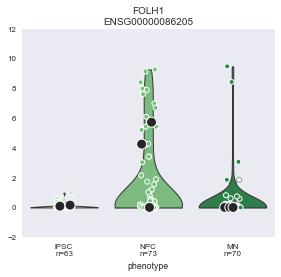

In [45]:
study.plot_gene('ENSG00000086205')

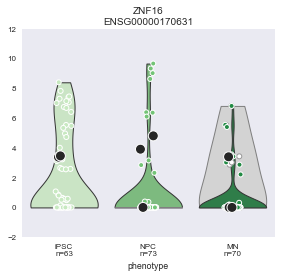

In [46]:
study.plot_gene("ENSG00000170631")

In [47]:
go = study.go_enrichment(df.loc[df['greater_than_zero'], 'gene_id'], df['gene_id'], min_feature_size=5, min_background_size=10)
go.head()

/home/obotvinnik/anaconda/lib/python2.7/site-packages/flotilla/data_model/gene_ontology.py:168: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  enrichment_df = enrichment_df.sort(columns=['p_value'])


,features_of_interest_in_go_term,features_of_interest_in_go_term_gene_symbols,go_domain,go_name,n_background_in_go_term,n_features_of_interest_in_go_term,n_features_total_in_go_term,p_value,bonferonni_corrected_p_value
GO:0060968,"ENSG00000197153,ENSG00000256018,ENSG0000020381...","HIST1H3J,HIST1H3G,HIST1H3H,HIST1H3B,HIST1H3D,C...",biological_process,regulation of gene silencing,10,10,11,0.000000e+00,0.000000e+00
GO:0006415,"ENSG00000148303,ENSG00000233927,ENSG0000019795...","RPL7A,RPS28,RPL12,MTRF1L,RPL35A,RPL18,RPL35,RP...",biological_process,translational termination,89,82,106,2.500538e-21,4.753523e-18
GO:0019083,"ENSG00000148303,ENSG00000233927,ENSG0000019795...","RPL7A,RPS28,RPL12,RPL35A,RPL18,RPL35,RPL4,RPL2...",biological_process,viral transcription,83,77,99,1.099805e-20,2.090729e-17
GO:0006414,"ENSG00000148303,ENSG00000233927,ENSG0000019795...","RPL7A,RPS28,RPL12,RPL35A,RPL18,RPL35,RPL4,RPL2...",biological_process,translational elongation,95,85,113,7.991946e-20,1.519269e-16
GO:0006413,"ENSG00000233927,ENSG00000197958,ENSG0000018289...","RPS28,RPL12,RPL35A,RPL35,UBA52,RPL19,EIF3F,RPL...",biological_process,translational initiation,130,106,155,2.351951e-17,4.471059e-14


In [48]:
go.head(10)

,features_of_interest_in_go_term,features_of_interest_in_go_term_gene_symbols,go_domain,go_name,n_background_in_go_term,n_features_of_interest_in_go_term,n_features_total_in_go_term,p_value,bonferonni_corrected_p_value
GO:0060968,"ENSG00000197153,ENSG00000256018,ENSG0000020381...","HIST1H3J,HIST1H3G,HIST1H3H,HIST1H3B,HIST1H3D,C...",biological_process,regulation of gene silencing,10,10,11,0.000000e+00,0.000000e+00
GO:0006415,"ENSG00000148303,ENSG00000233927,ENSG0000019795...","RPL7A,RPS28,RPL12,MTRF1L,RPL35A,RPL18,RPL35,RP...",biological_process,translational termination,89,82,106,2.500538e-21,4.753523e-18
GO:0019083,"ENSG00000148303,ENSG00000233927,ENSG0000019795...","RPL7A,RPS28,RPL12,RPL35A,RPL18,RPL35,RPL4,RPL2...",biological_process,viral transcription,83,77,99,1.099805e-20,2.090729e-17
GO:0006414,"ENSG00000148303,ENSG00000233927,ENSG0000019795...","RPL7A,RPS28,RPL12,RPL35A,RPL18,RPL35,RPL4,RPL2...",biological_process,translational elongation,95,85,113,7.991946e-20,1.519269e-16
GO:0006413,"ENSG00000233927,ENSG00000197958,ENSG0000018289...","RPS28,RPL12,RPL35A,RPL35,UBA52,RPL19,EIF3F,RPL...",biological_process,translational initiation,130,106,155,2.351951e-17,4.471059e-14
GO:0000184,"ENSG00000105771,ENSG00000233927,ENSG0000019795...","SMG9,RPS28,RPL12,PPP2R1A,RPL35,PAN2,RPL19,RPS1...",biological_process,"nuclear-transcribed mRNA catabolic process, no...",118,98,137,2.693407e-17,5.120166e-14
GO:0006614,"ENSG00000166562,ENSG00000233927,ENSG0000019795...","SEC11C,RPS28,RPL12,RPL35A,RPL35,RPL19,RPS18,RP...",biological_process,SRP-dependent cotranslational protein targetin...,108,91,126,4.691983e-17,8.919459e-14
GO:0006412,"ENSG00000166562,ENSG00000233927,ENSG0000019795...","SEC11C,RPS28,RPL12,RPL35A,RPL35,MRPL4,RPL19,EI...",biological_process,translation,257,183,310,1.472121e-16,2.798502e-13
GO:0019058,"ENSG00000148303,ENSG00000233927,ENSG0000019795...","RPL7A,RPS28,RPL12,RPL35A,RPL18,RPL35,RPL4,RPL2...",biological_process,viral infectious cycle,93,80,109,2.198596e-16,4.179530e-13
GO:0005840,"ENSG00000233927,ENSG00000197958,ENSG0000018289...","RPS28,RPL12,RPL35A,RPL35,MRPL30,MRPL4,RPL19,RP...",cellular_component,ribosome,172,131,220,3.175089e-16,6.035845e-13


### What's the difference between the two groups?

In [49]:
weird_samples

['M2_12', 'M6_07', 'M1_06', 'M6_03']

In [50]:
# data = study.expression.data.loc[mn_single_not_outlier, important_features]
data = study.expression.data.loc[weird_samples]
groupby = {'M2_12': 'group1', 'M6_07': 'group1', 'M1_06': 'group2', 'M6_03': 'group2'}

de_results = dict(
    (col, pd.Series(statistical_test(
        *[s for group, s in series.groupby(groupby)]),
        index=['statistic', 'p_value']))
    for col, series in data.iteritems())
de_results = pd.DataFrame.from_records(de_results).T
de_results['bonferonni_p_value'] = de_results.p_value*de_results.shape[0]
de_results = de_results.sort('bonferonni_p_value')
weird_samples_de = de_results.reset_index()
weird_samples_de = weird_samples_de.rename(columns={'index': 'gene_id'})
weird_samples_de = weird_samples_de.join(study.expression.feature_data['gene_name'], on='gene_id')
weird_samples_de.head()

/home/obotvinnik/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:12: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,gene_id,statistic,p_value,bonferonni_p_value,gene_name
0,ENSG00000247134,102818.437182,9.459278e-11,0.000002,RP11-11N9.4
1,ENSG00000146776,43883.696582,5.192704e-10,0.000008,ATXN7L1
2,ENSG00000101546,37788.070877,7.003104e-10,0.000011,RBFA
3,ENSG00000162402,22121.680143,2.043449e-09,0.000033,USP24
4,ENSG00000165512,21737.295861,2.116357e-09,0.000034,ZNF22


### PCA of constitutively expressed splicing events

### Get the splicing events

In [51]:
non_de_event_names = study.splicing.expression_to_splicing_id(non_de_genes)

### Plot PCA

In [52]:
study.metadata.data.columns

Index([u'single', u'pooled', u'phenotype', u'neuron', u'progenitor',
       u'stressed', u'craig_venter', u'differentiation_batch', u'split',
       u'outlier', u'MN_outlier'],
      dtype='object')

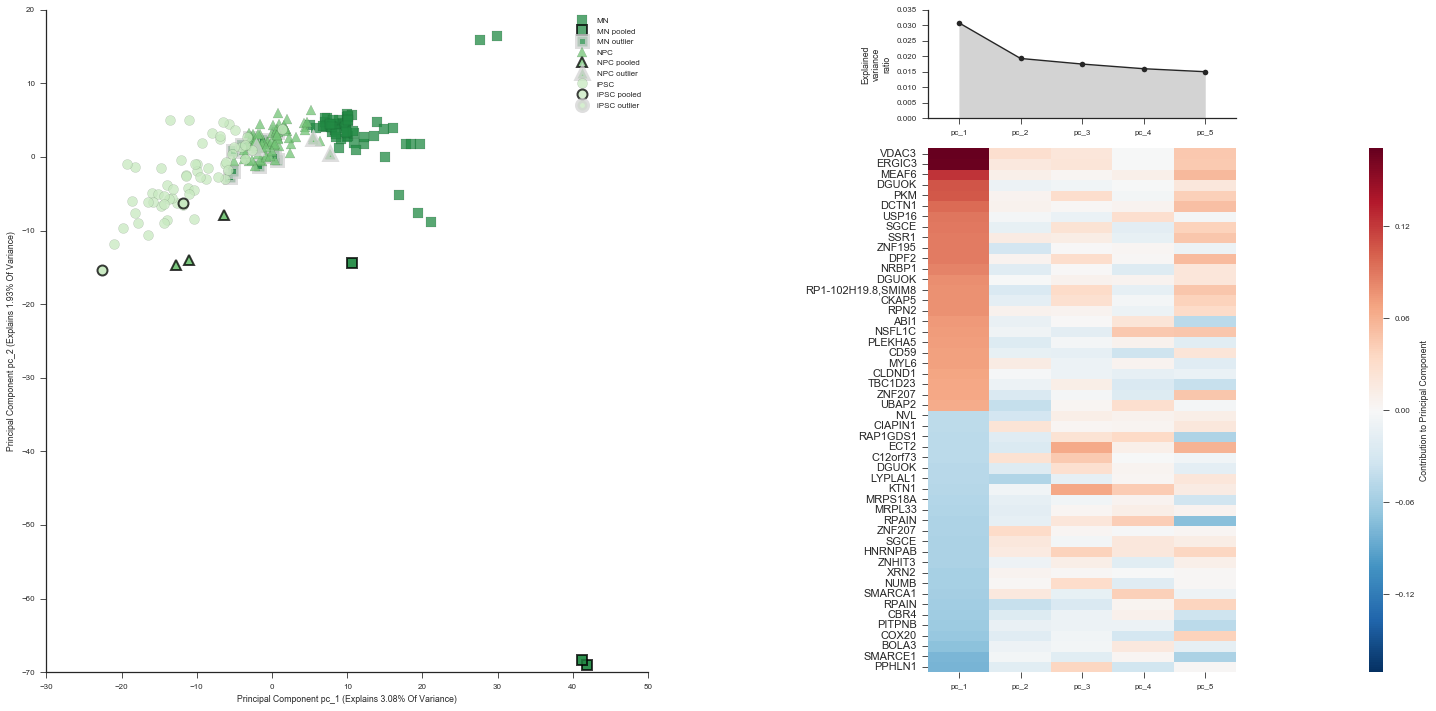

In [66]:
sns.set(style='ticks', context='paper')
study.plot_pca(feature_subset=non_de_event_names, data_type='splicing', show_vectors=False)
pcaviz.fig_reduced.savefig('{}/constitutively_expressed_genes_splicing_pca.pdf'.format(folder))

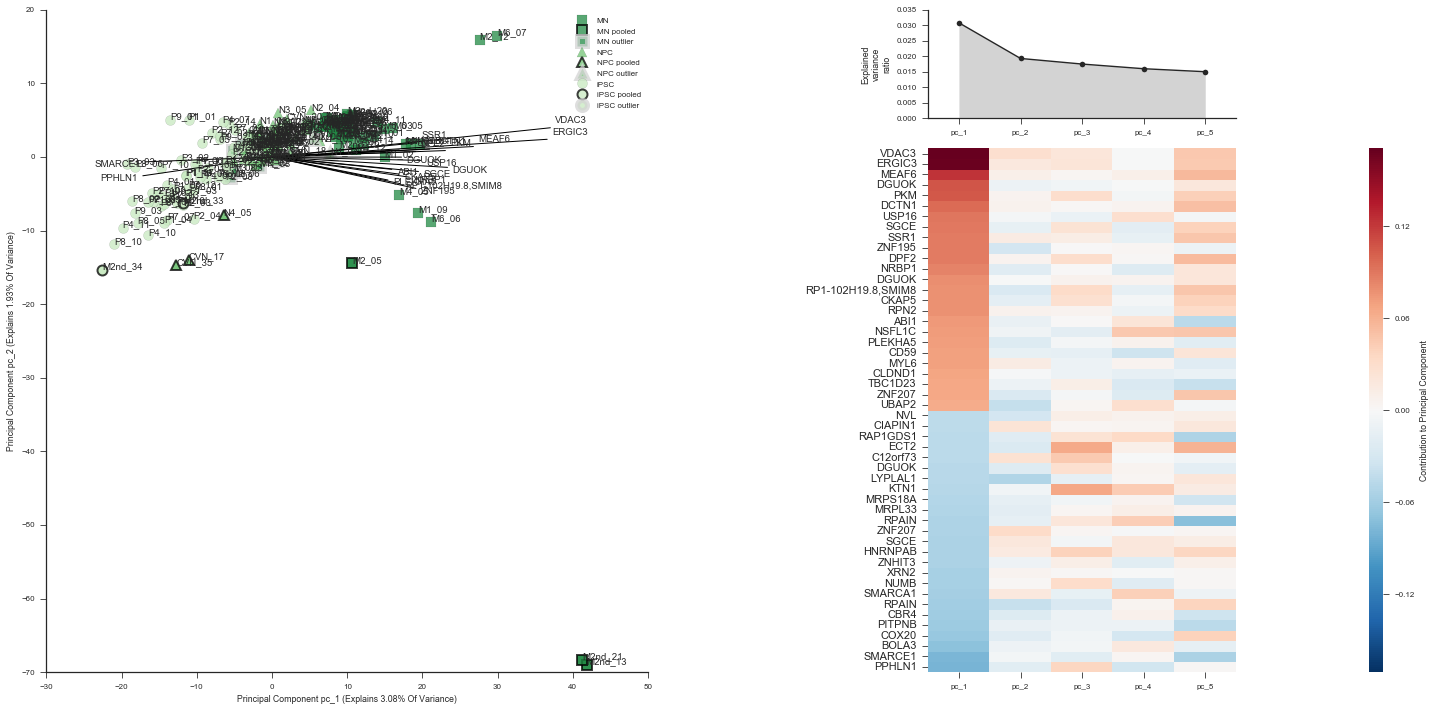

In [54]:
sns.set(style='ticks', context='paper')
study.plot_pca(feature_subset=non_de_event_names, data_type='splicing', show_point_labels=True)

In [55]:
ips_splicing_outliers = ['P9_03', 'P7_08', 'P1_05']
study.mapping_stats.data.loc[ips_splicing_outliers, 'Number of input reads']/1e6

P9_03    55.873523
P7_08    12.667408
P1_05    10.622759
Name: Number of input reads, dtype: float64

### What's so different about these iPSCs???

In [56]:
ipsc_samples = study.sample_subset_to_sample_ids('iPSC')
ipsc_singles = study.expression.singles.index.intersection(ipsc_samples)
ipsc_singles

Index([u'P1_01', u'P1_02', u'P1_03', u'P1_04', u'P1_05', u'P1_06', u'P1_07',
       u'P1_08', u'P1_09', u'P1_10', u'P1_11', u'P1_12', u'P2_01', u'P2_02',
       u'P2_03', u'P2_04', u'P2_05', u'P2_06', u'P2_07', u'P2_08', u'P2_09',
       u'P2_10', u'P2_11', u'P2_12', u'P2_13', u'P2_14', u'P3_01', u'P3_02',
       u'P3_03', u'P4_01', u'P4_06', u'P4_07', u'P4_08', u'P4_09', u'P4_10',
       u'P4_11', u'P4_12', u'P6_01', u'P6_02', u'P6_03', u'P6_04', u'P7_01',
       u'P7_02', u'P7_03', u'P7_04', u'P7_05', u'P7_06', u'P7_07', u'P7_08',
       u'P7_09', u'P7_10', u'P7_11', u'P7_12', u'P8_01', u'P8_02', u'P8_05',
       u'P8_06', u'P8_10', u'P8_11', u'P9_01', u'P9_02', u'P9_03', u'P9_04'],
      dtype='object')

In [57]:
study.metadata.data['iPSC_outlier'] = False
study.metadata.data.loc[ips_splicing_outliers, 'iPSC_outlier'] = True

In [58]:
# data = study.expression.data.loc[mn_single_not_outlier, important_features]
data = study.expression.data.loc[ipsc_singles]
groupby = study.metadata.data['iPSC_outlier']

de_results = dict(
    (col, pd.Series(statistical_test(
        *[s for group, s in series.groupby(groupby)]),
        index=['statistic', 'p_value']))
    for col, series in data.iteritems())
de_results = pd.DataFrame.from_records(de_results).T
de_results['bonferonni_p_value'] = de_results.p_value*de_results.shape[0]
de_results = de_results.sort('bonferonni_p_value')
ipsc_de = de_results.reset_index()
ipsc_de = ipsc_de.rename(columns={'index': 'gene_id'})
ipsc_de = ipsc_de.join(study.expression.feature_data['gene_name'], on='gene_id')
ipsc_de.head()

/home/obotvinnik/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:12: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,gene_id,statistic,p_value,bonferonni_p_value,gene_name
0,ENSG00000137558,-86.634012,1.430680e-65,2.293094e-61,PI15
1,ENSG00000170989,-74.031735,1.911065e-61,3.063055e-57,S1PR1
2,ENSG00000147509,-51.832448,3.772933e-52,6.047257e-48,RGS20
3,ENSG00000147234,-44.574884,2.960482e-48,4.745060e-44,FRMPD3
4,ENSG00000158863,-29.805095,4.598211e-38,7.370012e-34,FAM160B2


In [59]:
ipsc_de

,gene_id,statistic,p_value,bonferonni_p_value,gene_name
0,ENSG00000137558,-86.634012,1.430680e-65,2.293094e-61,PI15
1,ENSG00000170989,-74.031735,1.911065e-61,3.063055e-57,S1PR1
2,ENSG00000147509,-51.832448,3.772933e-52,6.047257e-48,RGS20
3,ENSG00000147234,-44.574884,2.960482e-48,4.745060e-44,FRMPD3
4,ENSG00000158863,-29.805095,4.598211e-38,7.370012e-34,FAM160B2
5,ENSG00000186666,-24.129219,6.699187e-33,1.073746e-28,BCDIN3D
6,ENSG00000162374,-18.743703,5.355210e-27,8.583331e-23,ELAVL4
7,ENSG00000112561,-18.552482,9.131256e-27,1.463558e-22,TFEB
8,ENSG00000081189,-17.132929,5.431822e-25,8.706124e-21,MEF2C
9,ENSG00000197355,-15.563053,6.516197e-23,1.044416e-18,UAP1L1


6171


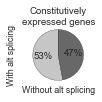

In [60]:
import collections
import itertools

event_per_genes = pd.Series(collections.Counter(itertools.chain(
            *study.splicing.feature_data.ensembl_id[non_de_event_names].map(
        lambda x: x.split(',')))))
# event_per_genes = s.groupby(s).size()
genes_without_splicing_events = pd.Index(non_de_genes).difference(event_per_genes.index)

print len(event_per_genes)

fig, ax = plt.subplots(figsize=(1.5, 1.5))
labels = 'Genes with alternative splice junctions', 'Genes without alternative slpice junctions'
sizes = [len(event_per_genes), len(genes_without_splicing_events)]
# colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
# explode = (0, 0.1, 0, 0) # only "explode" the 2nd slice (i.e. 'Hogs')

ax.pie(sizes, labels=None, colors=sns.color_palette('Greys', n_colors=2),
        autopct='%1.f%%', startangle=90)
# Set aspect ratio to be equal so that pie is drawn as a circle.
ax.axis('equal')
ax.set(ylabel='With alt splicing', 
       xlabel='Without alt splicing', title='Constitutively\nexpressed genes')
fig.tight_layout()
fig.savefig('{}/constitutively_expressed_genes_percentage_genes_with_events.pdf'.format(folder))


### Number of splicing events in all expressed genes

4622


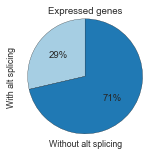

In [61]:
import collections
import itertools

event_per_genes = pd.Series(collections.Counter(itertools.chain(
            *study.splicing.feature_data.ensembl_id[study.splicing.data.columns].map(
        lambda x: x.split(',')))))
# event_per_genes = s.groupby(s).size()
genes_without_splicing_events = study.expression.data.columns.difference(event_per_genes.index)

print len(event_per_genes)

fig, ax = plt.subplots(figsize=(2.25, 2.25))
labels = 'Genes with alternative splice junctions', 'Genes without alternative slpice junctions'
sizes = [len(event_per_genes), len(genes_without_splicing_events)]
# colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
# explode = (0, 0.1, 0, 0) # only "explode" the 2nd slice (i.e. 'Hogs')

ax.pie(sizes, labels=None, colors=sns.color_palette('Paired'),
        autopct='%1.f%%', startangle=90)
# Set aspect ratio to be equal so that pie is drawn as a circle.
ax.axis('equal')
ax.set(ylabel='With alt splicing', 
       xlabel='Without alt splicing', title='Expressed genes')
fig.tight_layout()
fig.savefig('{}/percentage_genes_with_events.pdf'.format(folder))


In [62]:
sns.set(style='ticks', context='paper')

                     test_statistic   p_value
group2    group1                             
RBP       All genes        773126.0  0.000401
          lincRNA            5076.5  0.002704
          TF                44746.0  0.003799
All genes lincRNA           71323.5  0.042826
lincRNA   TF                 6046.5  0.091608
All genes TF               618147.0  0.500175


/home/obotvinnik/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:45: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


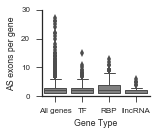

In [63]:
tf_events = event_per_genes[study.expression.feature_subsets['gerstberger2014_tf']].dropna()
rbp_events = event_per_genes[study.expression.feature_subsets['gerstberger2014_rbp_target_mrna']].dropna()
lincrna_events = event_per_genes[study.expression.feature_subsets['transcript_type: lincRNA']].dropna()

all_genes_events = event_per_genes.reset_index()
all_genes_events['Gene Type'] = 'All genes'

tf_events = tf_events.reset_index()
tf_events['Gene Type'] = 'TF'

rbp_events = rbp_events.reset_index()
rbp_events['Gene Type'] = 'RBP'

lincrna_events = lincrna_events.reset_index()
lincrna_events['Gene Type'] = 'lincRNA'

events_per_gene_type = pd.concat([all_genes_events, tf_events, rbp_events, lincrna_events])
events_per_gene_type = events_per_gene_type.rename(columns={0:'AS exons per gene'})

fig, ax = plt.subplots(figsize=(2.25, 2))
sns.boxplot(x='Gene Type', y='AS exons per gene', data=events_per_gene_type, linewidth=1, color='grey')
sns.despine()
ax.locator_params('y', nbins=5)
# ax.set_ylim(0, 100)

from scipy.stats import mannwhitneyu
import itertools

grouped = events_per_gene_type.groupby('Gene Type')
groups = grouped.groups.keys()

comparisons = itertools.combinations(groups, 2)

col = 'AS exons per gene'

results = []
for group1, group2 in comparisons:
    test_statistic, p_value = mannwhitneyu(grouped.get_group(group1)[col], grouped.get_group(group2)[col])
    results.append([group1, group2, test_statistic, p_value])

columns = ['group1', 'group2', 'test_statistic', 'p_value']

mannwhitney_results = pd.DataFrame(results, columns=columns)
mannwhitney_results = mannwhitney_results.set_index(['group2', 'group1']).sort_index()
print mannwhitney_results.sort('p_value')
# ## Know that RBP-everything else is significant, so plot those
# others = ('All genes', 'TF', 'lincRNA')
# xticklabels = [x.get_text() for x in ax.get_xticklabels()]
# rbp_i = xticklabels.index('RBP')

# ymax = grouped[col].max().max()

# offset = 0
# yrange = ymax - grouped[col].min().min()
# offset_interval = yrange*0.1
# for i, other in enumerate(others):
#     offset = offset_interval*(i+1)
#     other_i = xticklabels.index(other)
#     ax.annotate("", xy=(rbp_i, ymax+offset), xycoords='data',
#                xytext=(other_i, ymax+offset), textcoords='data',
#                arrowprops=dict(arrowstyle="-", ec='#444444',
#                                connectionstyle="bar,fraction=0.08"))
#     middle = abs((rbp_i + other_i)/2.)
#     ax.text(middle, ymax + offset, '***',
#            horizontalalignment='center',
#            verticalalignment='center', fontsize=16)
# ax.set(xlabel='*** $p<10^{-10}$')
fig.tight_layout()
fig.savefig('{}/splicing_events_per_gene.pdf'.format(folder))

## Venn Diagram of shared events

In [64]:
import matplotlib_venn

events_per_phenotype = dict((name, set(df.dropna(thresh=20, axis=1).dropna(how='all',axis=0).columns))
                            for name, df in splicing20.groupby(study.sample_id_to_phenotype))
events_per_phenotype_count = pd.Series(events_per_phenotype).map(len)

phenotypes, events = zip(*events_per_phenotype.items())

fig, ax = plt.subplots(figsize=(1.8, 1.8))
matplotlib_venn.venn3(events, set_labels=phenotypes, 
                      set_colors=[study.phenotype_to_color[p] for p in phenotypes])
ax = plt.gca()
ax.set_title('Alternative splicing events\n20+ cells per celltype')
fig = plt.gcf()
fig.tight_layout()
fig.savefig('/home/obotvinnik/Dropbox/figures2/singlecell_pnm/figure2_splicing/shared_events_venn_20_per_phenotype.pdf')

NameError: name 'splicing20' is not defined

## Lavalamp plots

In [ ]:
study.splicing.data.shape

In [ ]:
singles_no_outliers = study.splicing.singles.index.difference(study.splicing.outliers.index)
len(singles_no_outliers)

In [ ]:
splicing_singles = study.splicing.data.loc[singles_no_outliers]
splicing_singles_count = splicing_singles.groupby(study.sample_id_to_phenotype).count()
twenty_per_celltype = (splicing_singles_count >= 20).any(axis=0)
splicing20 = study.splicing.data[twenty_per_celltype[twenty_per_celltype].index]
print splicing20.shape

In [ ]:
sns.set(context='paper', style='ticks')

In [ ]:
fig, ax = plt.subplots(figsize=(2, 2))
plt.xscale('log', nonposx='clip')
sns.distplot(splicing20.values.flat, bins=np.linspace(0, 1, 20), color='grey', kde=False, vertical=True)
ax.set(yticks=(0, 0.5, 1), ylabel='$\Psi$', xlabel='AS Exons')
sns.despine()
fig.tight_layout()
fig.savefig('{}/splicing_20_per_celltype_distplot.pdf'.format(folder))

In [ ]:
fig, ax = plt.subplots(figsize=(4, 2))
flotilla.visualize.splicing.lavalamp(splicing20, color='grey', ax=ax)
# fig = plt.gcf()
fig.tight_layout()
fig.savefig('{}/splicing_20_per_celltype_lavalamp_all.png'.format(folder))

In [ ]:
fig, (ax_lavalamp, ax_hist) = plt.subplots(ncols=2, figsize=(3.75, 1), sharey=True,
                                           gridspec_kw=dict(width_ratios=(0.8, 0.2), wspace=0.05))

flotilla.visualize.splicing.lavalamp(splicing20, color='grey', ax=ax_lavalamp)

# Set the histogram axes as the current axes
plt.sca(ax_hist)
plt.xscale('log', nonposx='clip')
sns.distplot(splicing20.values.flat, bins=np.linspace(0, 1, 10), color='grey', 
             kde=False, vertical=True, ax=ax_hist)
# ax_hist.set(yticks=[], ylabel='', xlabel='')
sns.despine()
# fig.tight_layout()
fig.savefig('{}/splicing_20_per_celltype_distplot_lavalamp.pdf'.format(folder), dpi=72)

In [ ]:
sns.set(context='paper', style='ticks')

In [ ]:
import matplotlib_venn

events_per_phenotype = dict((name, set(df.dropna(thresh=20, axis=1).dropna(how='all',axis=0).columns))
                            for name, df in splicing20.groupby(study.sample_id_to_phenotype))
events_per_phenotype_count = pd.Series(events_per_phenotype).map(len)

phenotypes, events = zip(*events_per_phenotype.items())

fig, ax = plt.subplots(figsize=(1.8, 1.8))
matplotlib_venn.venn3(events, set_labels=phenotypes, 
                      set_colors=[study.phenotype_to_color[p] for p in phenotypes])
ax = plt.gca()
ax.set_title('Alternative splicing events\n20+ cells per celltype')
fig = plt.gcf()
fig.tight_layout()
fig.savefig('/home/obotvinnik/Dropbox/figures2/singlecell_pnm/figure2_splicing/shared_events_venn_20_per_phenotype.pdf')